In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read rwa_lr_training.csv
root_dir = "/Users/michaeldoherty/git/XLRON/data/JOCN_SI/rwa_lr"
training_data = pd.read_csv(f"{root_dir}/rwa_lr_training.csv")
episode_returns = training_data["RWA_LIGHTPATH_REUSE_NSFNET_100_GNN_INC - episode_returns_mean"]
accepted_services = 2000-(2000-episode_returns)/2
kspff_episode_returns = pd.read_csv(f"{root_dir}/rwa_lr_kspff.csv")
kspff_episode_returns = kspff_episode_returns["RWA_LIGHTPATH_REUSE_NSFNET_100_GNN_INC_ksp_ff - episode_returns_mean"]
kspff_accepted_services = 2000-(2000-episode_returns)/2
kspff_mean = kspff_accepted_services[1500:2000].mean()

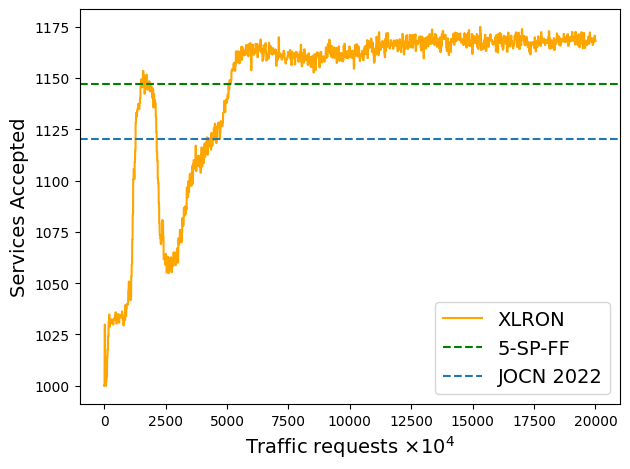

In [5]:
plt.plot(accepted_services, color="orange", label="XLRON")
plt.axhline(y=kspff_mean, color='green', linestyle='--', label='5-SP-FF')
plt.axhline(y=1120, linestyle='--', label='JOCN 2022')
plt.xlabel("Traffic requests $\\times 10^4$", fontsize=14)
plt.ylabel("Services Accepted", fontsize=14)
#plt.title("Training Results for XLRON vs. Benchmarks", fontsize=14)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Add more customization as needed
plt.legend(loc='lower right', fontsize=14)
plt.savefig("rwalr_training.png")

In [53]:
# Do boxplot of points 15000-20000 
accepted_services_final = accepted_services[15000:20000]
kspff_accepted_services_final = kspff_accepted_services[1500:2000]
plt.boxplot([accepted_services_final, kspff_accepted_services_final], labels=["XLRON", "KSP-FF"], sym="", positions=[0.1,0.5])
plt.ylabel("Services Accepted", fontsize=14)

In [67]:
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12) 
fig = plt.figure()
xlabels = ["CG", "EG"]
ax = fig.add_subplot(111)
ax.boxplot([accepted_services_final, kspff_accepted_services_final], sym="", positions=[0.1,0.5])
ax.set_xticklabels(["XLRON", "KSP-FF"], fontsize=14)
plt.ylabel("Services Accepted", fontsize=14)